# Oldschool Runescape Skills Analysis

### Import Python libraries

In [1]:
# Import libraries
import ipywidgets as widgets
from IPython.display import clear_output
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Load player data
The data being used was pulled from the official OSRS hiscores API and is a csv list of 20 players and their total experience amounts across all skills.

In [2]:
# Load experience data from csv file
filename = 'player_xp_data.csv'
df = pd.read_csv(filename)

# Convert data columns to numpy arrays
player_name = df.loc[:, 'player_name'].values
attack = df.loc[:, 'attack'].values
strength = df.loc[:, 'strength'].values
defence = df.loc[:, 'defence'].values
ranged = df.loc[:, 'ranged'].values
prayer = df.loc[:, 'prayer'].values
magic = df.loc[:, 'magic'].values
runecrafting = df.loc[:, 'runecrafting'].values
construction = df.loc[:, 'construction'].values
hitpoints = df.loc[:, 'hitpoints'].values
agility = df.loc[:, 'agility'].values
herblore = df.loc[:, 'herblore'].values
thieving = df.loc[:, 'thieving'].values
crafting = df.loc[:, 'crafting'].values
fletching = df.loc[:, 'fletching'].values
slayer = df.loc[:, 'slayer'].values
hunter = df.loc[:, 'hunter'].values
mining = df.loc[:, 'mining'].values
smithing = df.loc[:, 'smithing'].values
fishing = df.loc[:, 'fishing'].values
cooking = df.loc[:, 'cooking'].values
firemaking = df.loc[:, 'firemaking'].values
woodcutting = df.loc[:, 'woodcutting'].values
farming = df.loc[:, 'farming'].values

# Sum XP totals for each skill
attack_sum = np.sum(attack)
strength_sum = np.sum(strength)
defence_sum = np.sum(defence)
ranged_sum = np.sum(ranged)
prayer_sum = np.sum(prayer)
magic_sum = np.sum(magic)
runecrafting_sum = np.sum(runecrafting)
construction_sum = np.sum(construction)
hitpoints_sum = np.sum(hitpoints)
agility_sum = np.sum(agility)
herblore_sum = np.sum(herblore)
thieving_sum = np.sum(thieving)
crafting_sum = np.sum(crafting)
fletching_sum = np.sum(fletching)
slayer_sum = np.sum(slayer)
hunter_sum = np.sum(hunter)
mining_sum = np.sum(mining)
smithing_sum = np.sum(smithing)
fishing_sum = np.sum(fishing)
cooking_sum = np.sum(cooking)
firemaking_sum = np.sum(firemaking)
woodcutting_sum = np.sum(woodcutting)
farming_sum = np.sum(farming)

# Create list for skill names
skills = []
for (cname, cdata) in df.iteritems():
    if cname != 'player_name':
        skills.append(cname)

### Combat Skill Comparison
This plot chart compares the experience (XP) totals for each player by the combat-type skills.

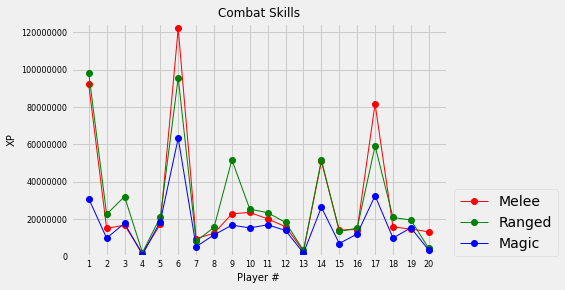

In [3]:
player_num = [*range(1, 21, 1)]
plt.style.use('fivethirtyeight')
plt.plot(player_num, strength, c='r', marker='o', linewidth=1, label='Melee')
plt.plot(player_num, ranged, c='g', marker='o',  linewidth=1, label='Ranged')
plt.plot(player_num, magic, c='b', marker='o',  linewidth=1, label='Magic')
plt.legend(loc=(1.02,0))
plt.xlim(left=0, right=21)
plt.ylim(bottom=0, top=125000000)
plt.xticks(range(1,21), fontsize=8)
plt.yticks(fontsize=8)
plt.ticklabel_format(style='plain')
plt.xlabel('Player #', fontsize=10)
plt.ylabel('XP', fontsize=10)
plt.title('Combat Skills', fontsize=12)
plt.show()

### Gathering Skill Comparison
This pie chart compares the experience (XP) totals for each player by the gathering-type skills.

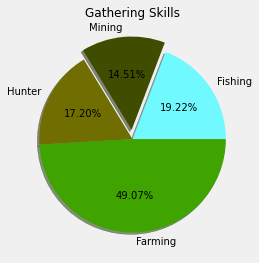

In [4]:
gathering_total = np.array([fishing_sum, mining_sum, hunter_sum, farming_sum])
gathering_labels = ['Fishing', 'Mining', 'Hunter', 'Farming']
gathering_colors = ['#70faff', '#404d00', '#706e00', '#3fa300']

plt.pie(gathering_total, labels=gathering_labels, explode=[0,0.1,0,0], colors=gathering_colors, autopct = '%0.2f%%',
        shadow=True, textprops={"fontsize":10})
plt.title('Gathering Skills', fontsize=12)
plt.show()

### Support Skill Comparison
This bar chart compares the experience (XP) totals for each player by the support-type skills.

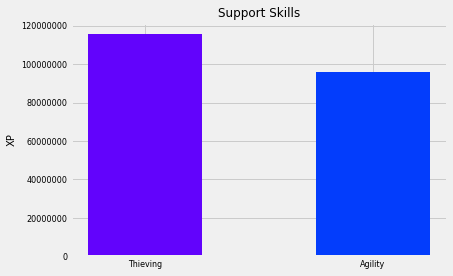

In [5]:
support_total = np.array([thieving_sum, agility_sum])
support_labels = ['Thieving', 'Agility']

plt.ticklabel_format(style='plain')
plt.bar(support_labels, support_total, color=['#6203fc','#033dfc'], width=0.5)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ylabel('XP', fontsize=10)
plt.title('Support Skills', fontsize=12)
plt.show()

### Decision Tree Analysis
Using a decision tree algorithm, a list of selected skills are compared to determine which one players would be least likely to level. The outcome can be used to influence decisions on future game updates.

In [6]:
# Decision tree algorithm
def decision_tree_alg(b):
    
    # Get checkbox selections
    selected_skills = []
    for i in range(0, len(checkboxes)):
        if checkboxes[i].value == True:
            selected_skills = selected_skills + [checkboxes[i].description]

    # Algorithm to determine lowest value skill
    selected_skills_sum = []
    for i in selected_skills:
        temp_xp = df.loc[:, i].values
        temp_sum = np.sum(temp_xp)
        selected_skills_sum.append(temp_sum)

    if len(selected_skills_sum) > 0:
        lowest_xp = selected_skills_sum[0]
        lowest_skill = selected_skills[0]
        for i in range(len(selected_skills_sum)):
            if selected_skills_sum[i] < lowest_xp:
                lowest_xp = selected_skills_sum[i]
                lowest_skill = selected_skills[i]

        # Output string to display lowest skill and XP amount
        print(f'Players are less likely to train {lowest_skill.upper()}.')
        print(f'Prediction accuracy: 100%')

#### Instructions:
1. Select the skills you would like to compare.
2. Click 'Run'.
3. A result will be displayed.
4. To try a different set of skills, refresh the page and re-run the steps.

In [7]:
# Checkboxes to select skills to display
checkboxes = [widgets.Checkbox(value=False, description=label) for label in skills]
output = widgets.VBox(children=checkboxes)
display(output)

# Run button for algorithm
button = widgets.Button(description='Run')
output = widgets.Output()
display(button, output)
button.on_click(decision_tree_alg)
clear_output(wait=True)

Button(description='Run', style=ButtonStyle())

Output()